In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

import random
import numpy as np

### Util Funcitons

In [30]:
def generate_node() -> tuple((float, float)):
    """
    Return a tuple of two float value <x, y>
    when x, y <= +-100
    """
    x = random.randint(-10000, 10000)
    y = random.randint(-10000, 10000)
    return (x / 100, y / 100)

def step_function(data: int) -> int:
    """
    Step function
    """
    return 1 if data > 1 else -1

def create_data(n: int = 1000, index: int = 1) -> tuple:
    """
    Create two arrays of data, the first one called data contains n tuples of two random float value <x, y>,
    the second called label contains n labels of the data values: 1 if data.y > 1 else -1
    """
    data = []
    label = []
    for _ in range(n):
        node = generate_node()
        data.append(node)
        label.append(step_function(node[index]))
    return (np.array(data), np.array(label))

def accuracy(predicted: list, test_label: list) -> float:
    """
    Given a predicted label and the test label return the accuracy
    """
    count = 0
    for i, j in zip(predicted, test_label):
        if i == j:
            count += 1
    return count / len(predicted)
    
def MSE(predicted: list, test_label: list) -> float:
    """
    Calculate the MSE (Mean Square error)
    """
    return ((np.array(predicted) - np.array(test_label))**2).mean()

### Adaline Model

In [31]:
LEARNING_RATE = 0.01
RANDOM_STATE = 1
EPOCH = 30

class AdalineModel(object):
    def __init__(self, epoch: int = EPOCH, random_state: int = RANDOM_STATE):
        self.epoch = epoch
        self.random_state = random_state
        self.bias = 0.1
        
    def fit(self, X: list, y: list):
        state = np.random.RandomState(self.random_state)
        self.weights = state.normal(loc=0.0, scale=0.1, size=train_data.shape[1]) # generate new weights
        self.errors = []
        self.accuracies = []
        
        for _ in range(self.epoch):
            predicted = [step_function(x) for x in self.activation(X)]  # get all the predicted values
            errors = y - predicted  # get all the error between real label and predicted
            self.weights[:] = self.weights[:] + LEARNING_RATE * X.T.dot(errors)  # update weights
            self.bias = self.bias + LEARNING_RATE * errors.sum()  # update bias
            self.errors.append(MSE(predicted, y))  # add current error to errors list
            self.accuracies.append(accuracy(predicted, y))  # add the current accuracy to accuracies list

    def net_input(self, X: list) -> list:
        result = np.dot(X, self.weights[:]) + self.bias
        return result
    
    def activation(self, X: list) -> list:
        return self.net_input(X)

    def predict(self, X: list) -> list:
        return [step_function(x) for x in self.activation(X)]

### Example

In [32]:
train_data, train_label = create_data()

# create and fit a model
adaline_model = AdalineModel()
adaline_model.fit(np.array(train_data), np.array(train_label))

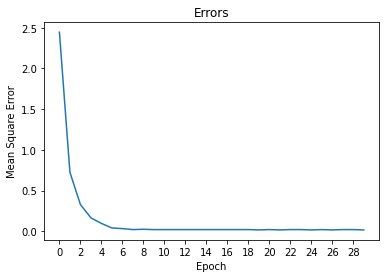

In [33]:
plt.plot(adaline_model.errors, label="errors")
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.title('Errors')
plt.xticks(np.arange(EPOCH, step=2))
plt.show()

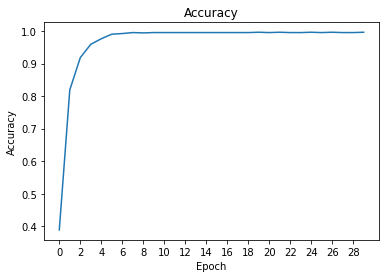

In [34]:
plt.plot(adaline_model.accuracies, label='accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(np.arange(EPOCH, step=2))
plt.show()

In [35]:
# predict for test_data_1
test_data_1, test_label_1 = create_data()
predicted = adaline_model.predict(np.array(test_data_1))
print(f"Accuracy for test_data_1: {accuracy(test_label_1, predicted)}")

# predict for test_data_2
test_data_2, test_label_2 = create_data()
predicted = adaline_model.predict(np.array(test_data_2))
print(f"Accuracy for test_data_2: {accuracy(test_label_1, predicted)}")

Accuracy for test_data_1: 0.999
Accuracy for test_data_2: 0.465


## Part B:

In [36]:
def step_function(data: int) -> int:
    """
    Step function
    """
    return 1 if data > 1 else -1

In [9]:
# 4 <= x^2 + y^2 <= 9
